In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import pandas as pd
import seaborn as sns
from scipy.io import arff
import data_processing as dp
import data_cleaning as dc
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

warnings.filterwarnings("ignore")

In [14]:
def logistic_regression_model(*args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    logistic_model = LogisticRegression()

    logistic_model.fit(X_train, y_train)

    train_predictions = logistic_model.predict(X_train)
    test_predictions = logistic_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(classification_report(y_test, test_predictions))
    print(confusion_matrix(y_test, test_predictions))
    print("test predictions: ", test_predictions, len(test_predictions))
    print(f"train_accuracy: {train_accuracy}")
    print(f"test_accuracy: {test_accuracy}")

    return train_accuracy, test_accuracy

In [15]:
df_to_share = pd.read_pickle("df_to_share.pkl")
df = df_to_share.copy()
df = pd.read_csv("3year.csv")

def preprocess(df):
    X, y = dc.get_Xy(df)
    X_train, X_test, y_train, y_test = dc.train_test_split(
        X, y, test_size=0.3, random_state=3244
    )
    return X_train, X_test, y_train, y_test

train_test_dataset = preprocess(df)  # with SMOTE
print(f"X_train.shape: {train_test_dataset[0].shape}")
logistic_regression_model(*train_test_dataset)

X_train.shape: (7350, 63)
              precision    recall  f1-score   support

    bankrupt       1.00      0.01      0.01       152
not-bankrupt       0.95      1.00      0.98      2999

    accuracy                           0.95      3151
   macro avg       0.98      0.50      0.49      3151
weighted avg       0.95      0.95      0.93      3151

[[   1  151]
 [   0 2999]]
test predictions:  ['not-bankrupt' 'not-bankrupt' 'not-bankrupt' ... 'not-bankrupt'
 'not-bankrupt' 'not-bankrupt'] 3151
train_accuracy: 0.9531972789115646
test_accuracy: 0.952078705172961


(0.9531972789115646, 0.952078705172961)

              precision    recall  f1-score   support

    bankrupt       0.00      0.00      0.00       152
not-bankrupt       0.95      1.00      0.98      2999

    accuracy                           0.95      3151
   macro avg       0.48      0.50      0.49      3151
weighted avg       0.91      0.95      0.93      3151

[[   0  152]
 [   0 2999]]
test predictions:  ['not-bankrupt' 'not-bankrupt' 'not-bankrupt' ... 'not-bankrupt'
 'not-bankrupt' 'not-bankrupt'] 3151
train_accuracy: 0.9533333333333334
test_accuracy: 0.9517613456045699
              precision    recall  f1-score   support

    bankrupt       1.00      0.01      0.01       152
not-bankrupt       0.95      1.00      0.98      2999

    accuracy                           0.95      3151
   macro avg       0.98      0.50      0.49      3151
weighted avg       0.95      0.95      0.93      3151

[[   1  151]
 [   0 2999]]
test predictions:  ['not-bankrupt' 'not-bankrupt' 'not-bankrupt' ... 'not-bankrupt'
 'not-bankrupt' 'n

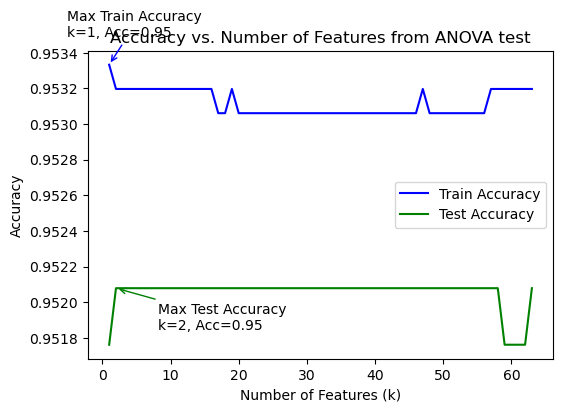

model metrics after ANOVA
              precision    recall  f1-score   support

    bankrupt       1.00      0.01      0.01       152
not-bankrupt       0.95      1.00      0.98      2999

    accuracy                           0.95      3151
   macro avg       0.98      0.50      0.49      3151
weighted avg       0.95      0.95      0.93      3151

[[   1  151]
 [   0 2999]]
test predictions:  ['not-bankrupt' 'not-bankrupt' 'not-bankrupt' ... 'not-bankrupt'
 'not-bankrupt' 'not-bankrupt'] 3151
train_accuracy: 0.9531972789115646
test_accuracy: 0.952078705172961


(0.9531972789115646, 0.952078705172961)

In [16]:
best_train_test_dataset = dp.find_best_k_features_from_ANOVA(
    logistic_regression_model, *train_test_dataset
)

print("model metrics after ANOVA")
logistic_regression_model(*best_train_test_dataset)